# Multiclass Data => probability of belonging to that class

### 랜덤 데이터 생성

In [7]:
import numpy as np

np.random.seed(0)
# 데이터 생성
s0 = np.random.uniform(0, 0.25, size=(100, 25, 25, 3))
s1 = np.random.uniform(0.25, 0.5, size=(100, 25, 25, 3))
s2 = np.random.uniform(0.5, 0.75, size=(100, 25, 25, 3))
s3 = np.random.uniform(0.75, 1, size=(100, 25, 25, 3))

# 레이블 생성
l0 = np.array([1, 0, 0, 0])
l1 = np.array([0, 1, 0, 0])
l2 = np.array([0, 0, 1, 0])
l3 = np.array([0, 0, 0, 1])

# 데이터 합치기
data = np.vstack((s0, s1, s2, s3))  # 데이터를 수직으로 쌓기

# 레이블 합치기 (데이터 개수와 일치하도록 반복하여 추가)
labels = np.concatenate([np.tile(l0, (100, 1)), np.tile(l1, (100, 1)), np.tile(l2, (100, 1)), np.tile(l3, (100, 1))])

print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)
print(f'labels {labels}')

Shape of data: (400, 25, 25, 3)
Shape of labels: (400, 4)
labels [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


## 시각화

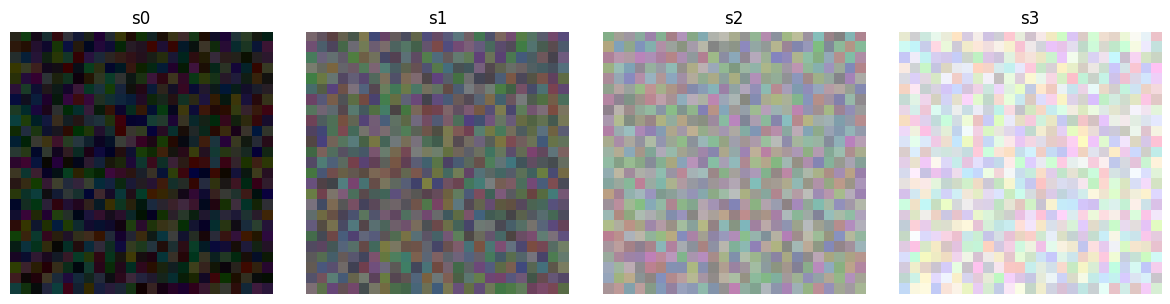

In [5]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))


plt.subplot(1, 4, 1)
plt.imshow(s0[0])
plt.axis('off')
plt.title('s0')

plt.subplot(1, 4, 2)
plt.imshow(s1[0])
plt.axis('off')
plt.title('s1')


plt.subplot(1, 4, 3)
plt.imshow(s2[0])
plt.axis('off')
plt.title('s2')


plt.subplot(1, 4, 4)
plt.imshow(s3[0])
plt.axis('off')
plt.title('s3')

plt.tight_layout()
plt.show()


## 모델 설계

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [12]:
model.fit(data, labels, epochs = 10, batch_size = 32)

Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 0.5167 - accuracy: 0.3475
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3917 - accuracy: 0.5400
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2226 - accuracy: 0.8900
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0848 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 8.3474e-04 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 10ms/step - loss: 4.9270e-04 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 0s 9ms/step - loss: 3.6103e-04 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 0s 8ms/step - loss: 3.0037e-04 - accuracy: 1.0000
